In [43]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import copy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn import metrics
import scikitplot as skplt
import seaborn as sns
import xgboost 

In [44]:
os.chdir('C:/Users/shiva/Desktop/Master_Thesis/final-data')
data=pd.read_csv('dt_final_new_features.csv')

C:\Users\shiva\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
df = data[[
 'label4',
 'glove_vec300_norm', # normalize
 'tfidf_art', # normalize
 'negative_conc',
 'positive_conc',
 'weak_subj',
 'strong_subj',
 'hyperbolic_terms',
 'attitude_markers',
 'kill_verbs',
 'bias_lexicon',
 'action_verbs',
 'comparative_forms',
 'modal_adverbs',
 'manner_adverbs',
 'superlative_forms',
 'assertive_verbs',
 'factive_verbs',
 'report_verbs',
 'implicative_verbs',
 'hedges',
 'boosters',
 'affect ',
 'posemo ',
 'negemo ',
 'anx ',
 'anger ',
 'sad ',
 'social ',
 'family ',
 'friend ',
 'female ',
 'male ',
 'cogproc ',
 'insight ',
 'cause ',
 'discrep ',
 'tentat ',
 'certain ',
 'differ ',
 'percept ',
 'see ',
 'hear ',
 'feel ',
 'bio ',
 'body ',
 'health ',
 'sexual ',
 'ingest ',
 'drives ',
 'affiliation ',
 'achieve ',
 'power ',
 'reward ',
 'risk ',
 'focuspast ',
 'focuspresent ',
 'focusfuture ',
 'relativ ',
 'motion ',
 'space ',
 'time ',
 'work ',
 'leisure ',
 'home ',
 'money ',
 'relig ',
 'death ',
 'informal ',
 'swear ',
 'netspeak ',
 'assent ',
 'nonflu ',
 'filler ',
 'pos_ADJ',
 'pos_ADP',
 'pos_ADV',
 'pos_AUX',
 'pos_DET',
 'pos_INTJ',
 'pos_NOUN',
 'pos_PRON',
 'pos_PROPN',
 'pos_SCONJ',
 'pos_VERB',
 'pos_X',
 'dep_ROOT',
 'dep_acl',
 'dep_acomp',
 'dep_advcl',
 'dep_advmod',
 'dep_agent',
 'dep_amod',
 'dep_appos',
 'dep_attr',
 'dep_aux',
 'dep_auxpass',
 'dep_case',
 'dep_cc',
 'dep_ccomp',
 'dep_compound',
 'dep_conj',
 'dep_csubj',
 'dep_dative',
 'dep_dep',
 'dep_det',
 'dep_dobj',
 'dep_expl',
 'dep_intj',
 'dep_mark',
#  'dep_meta',
 'dep_neg',
 'dep_nmod',
 'dep_npadvmod',
 'dep_nsubj',
 'dep_nsubjpass',
 'dep_nummod',
 'dep_oprd',
 'dep_parataxis',
 'dep_pcomp',
 'dep_pobj',
 'dep_poss',
 'dep_preconj',
 'dep_predet',
 'dep_prep',
 'dep_prt',
 'dep_punct',
 'dep_quantmod',
 'dep_relcl',
 'dep_xcomp',
 'ne_CARDINAL',
 'ne_DATE',
 'ne_EVENT',
 'ne_FAC',
 'ne_GPE',
 'ne_LANGUAGE',
 'ne_LAW',
 'ne_LOC',
 'ne_MONEY',
 'ne_NORP',
 'ne_ORDINAL',
 'ne_ORG',
 'ne_PERCENT',
 'ne_PERSON',
 'ne_PRODUCT',
 'ne_QUANTITY',
 'ne_TIME',
 'ne_WORK_OF_ART',
 'negative_conc_context',
 'positive_conc_context',
 'weak_subj_context',
 'strong_subj_context',
 'hyperbolic_terms_context',
 'attitude_markers_context',
 'kill_verbs_context',
 'bias_lexicon_context',
 'action_verbs_context',
 'comparative_forms_context',
 'modal_adverbs_context',
 'manner_adverbs_context',
 'superlative_forms_context',
 'assertive_verbs_context',
 'factive_verbs_context',
 'report_verbs_context',
 'implicative_verbs_context',
 'hedges_context',
 'boosters_context',
 'affect _context',
 'posemo _context',
 'negemo _context',
 'anx _context',
 'anger _context',
 'sad _context',
 'social _context',
 'family _context',
 'friend _context',
 'female _context',
 'male _context',
 'cogproc _context',
 'insight _context',
 'cause _context',
 'discrep _context',
 'tentat _context',
 'certain _context',
 'differ _context',
 'percept _context',
 'see _context',
 'hear _context',
 'feel _context',
 'bio _context',
 'body _context',
 'health _context',
 'sexual _context',
 'ingest _context',
 'drives _context',
 'affiliation _context',
 'achieve _context',
 'power _context',
 'reward _context',
 'risk _context',
 'focuspast _context',
 'focuspresent _context',
 'focusfuture _context',
 'relativ _context',
 'motion _context',
 'space _context',
 'time _context',
 'work _context',
 'leisure _context',
 'home _context',
 'money _context',
 'relig _context',
 'death _context',
 'informal _context',
 'swear _context',
 'netspeak _context',
 'assent _context',
 'nonflu _context',
 'filler _context',
 'pos_ADJ_context',
 'pos_ADP_context',
 'pos_ADV_context',
 'pos_AUX_context',
 'pos_DET_context',
 'pos_INTJ_context',
 'pos_NOUN_context',
 'pos_PRON_context',
 'pos_PROPN_context',
 'pos_SCONJ_context',
 'pos_VERB_context',
 'pos_X_context',
 'dep_ROOT_context',
 'dep_acl_context',
 'dep_acomp_context',
 'dep_advcl_context',
 'dep_advmod_context',
 'dep_agent_context',
 'dep_amod_context',
 'dep_appos_context',
 'dep_attr_context',
 'dep_aux_context',
 'dep_auxpass_context',
 'dep_case_context',
 'dep_cc_context',
 'dep_ccomp_context',
 'dep_compound_context',
 'dep_conj_context',
 'dep_csubj_context',
 'dep_dative_context',
 'dep_dep_context',
 'dep_det_context',
 'dep_dobj_context',
 'dep_expl_context',
 'dep_intj_context',
 'dep_mark_context',
#  'dep_meta_context',
 'dep_neg_context',
 'dep_nmod_context',
 'dep_npadvmod_context',
 'dep_nsubj_context',
 'dep_nsubjpass_context',
 'dep_nummod_context',
 'dep_oprd_context',
 'dep_parataxis_context',
 'dep_pcomp_context',
 'dep_pobj_context',
 'dep_poss_context',
 'dep_preconj_context',
 'dep_predet_context',
 'dep_prep_context',
 'dep_prt_context',
 'dep_punct_context',
 'dep_quantmod_context',
 'dep_relcl_context',
 'dep_xcomp_context',
 'ne_CARDINAL_context',
 'ne_DATE_context',
 'ne_EVENT_context',
 'ne_FAC_context',
 'ne_GPE_context',
 'ne_LAW_context',
 'ne_LOC_context',
 'ne_MONEY_context',
 'ne_NORP_context',
 'ne_ORDINAL_context',
 'ne_ORG_context',
 'ne_PERCENT_context',
 'ne_PERSON_context',
 'ne_PRODUCT_context',
 'ne_QUANTITY_context',
 'ne_TIME_context',
 'ne_WORK_OF_ART_context',
 'ne_LANGUAGE_context']]

In [46]:
print('Number of missing values:')
mis = (df.isnull().sum()).to_frame()
for i, row in mis.iterrows():
    if row[0] > 0:
        print(i, row[0])

# Delete the rows with missing article text:
df = df.dropna(subset=['tfidf_art'])

Number of missing values:
tfidf_art 2142


In [47]:
x = df.drop(['label4'], 1)
y4 = df[['label4']]

In [48]:
x_scaled = copy.deepcopy(x)

scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled['glove_vec300_norm'] = scaler.fit_transform(x_scaled[['glove_vec300_norm']])
x_scaled['tfidf_art'] = scaler.fit_transform(x_scaled[['tfidf_art']])

In [50]:
train_features, test_features, train_labels, test_labels = train_test_split(x, y4, 
                                                                            test_size = 0.2, random_state = 42, stratify=y4)
#train_features1, val_features, train_labels1, val_labels = train_test_split(train_features, train_labels, 
                                                                            #test_size = 0.10, random_state = 42)

In [8]:
#x_train, x_test, y4_train, y4_test = train_test_split(x,y4, test_size=0.2, random_state=4, stratify=y4)

In [51]:
feature_names = list(x.columns)

In [52]:
dtrain = xgboost.DMatrix(train_features, label=train_labels, feature_names=feature_names)
dtest = xgboost.DMatrix(test_features, label=test_labels, feature_names=feature_names)
# dtrain1 = xgboost.DMatrix(train_features1, label=train_labels1, feature_names=feature_names)
# dval = xgboost.DMatrix(val_features, label=val_labels, feature_names=feature_names)

In [53]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)
# print('Training Features for final model Shape:', train_features1.shape)
# print('Training Labels for final model Shape:', train_labels1.shape)
# print('Validation Features Shape:', val_features.shape)
# print('Validation Labels Shape:', val_labels.shape)

Training Features Shape: (51794, 290)
Training Labels Shape: (51794, 1)
Testing Features Shape: (12949, 290)
Testing Labels Shape: (12949, 1)


Random guesser

In [54]:
baseline1 = pd.Series(np.random.randint(2, size=len(test_features)))

In [55]:
print('Performance of baseline1, test:')
print('F1:', round(metrics.f1_score(test_labels,baseline1),2))
print('Precision:', round(metrics.precision_score(test_labels,baseline1),2))
print('Recall:', round(metrics.recall_score(test_labels,baseline1),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,baseline1),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,baseline1),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,baseline1).transpose())

Performance of baseline1, test:
F1: 0.12
Precision: 0.07
Recall: 0.51
AUC: 0.51
Accuracy: 0.5
Confusion matrix:
 [[6031  415]
 [6065  438]]


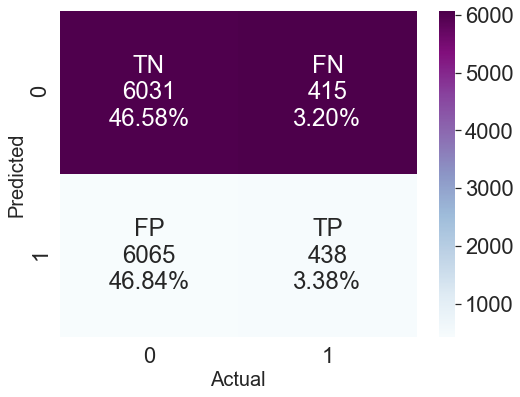

In [56]:
cf_matrix = metrics.confusion_matrix(test_labels,baseline1)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

Negative Sentiment lexicon


In [62]:
baseline2 = test_features.negative_conc


In [65]:
from sklearn.metrics import classification_report
print(classification_report(test_labels,baseline2))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     12096
           1       0.22      0.43      0.29       853

    accuracy                           0.86     12949
   macro avg       0.59      0.66      0.61     12949
weighted avg       0.91      0.86      0.88     12949



In [58]:
print('Performance of b2, test:')
print('F1:', round(metrics.f1_score(test_labels,baseline2),2))
print('Precision:', round(metrics.precision_score(test_labels,baseline2),2))
print('Recall:', round(metrics.recall_score(test_labels,baseline2),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,baseline2),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,baseline2),2))
print('Confusion matrix:\n', metrics.confusion_matrix(test_labels,baseline2).transpose())

Performance of b2, test:
F1: 0.29
Precision: 0.22
Recall: 0.43
AUC: 0.66
Accuracy: 0.86
Confusion matrix:
 [[10832   488]
 [ 1264   365]]


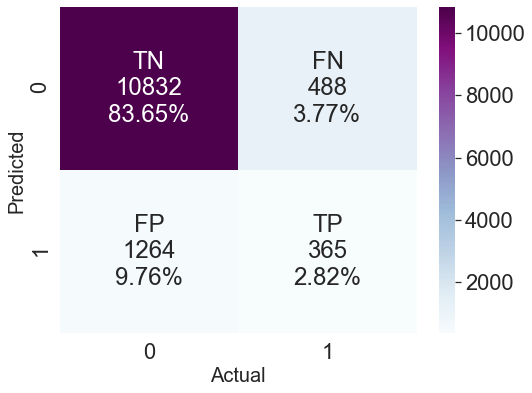

In [59]:
cf_matrix = metrics.confusion_matrix(test_labels,baseline2)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

No handles with labels found to put in legend.


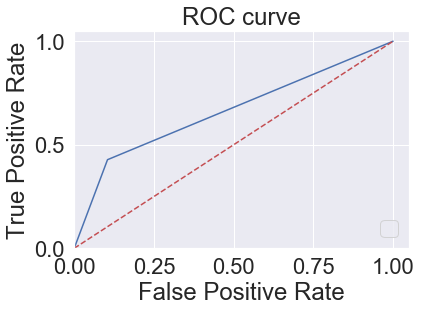

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#cf_matrix = metrics.confusion_matrix(test_labels,baseline2)
Neg_roc_auc = roc_auc_score(test_labels, baseline2)
fpr, tpr, thresholds = roc_curve(test_labels, baseline2)
plt.figure()
plt.plot(fpr, tpr, Neg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
#plt.savefig('XGB_ROC')
plt.show()

Negative and positive sentiment lexicon

In [20]:
baseline3 = test_features.apply(lambda row: 1 if row.negative_conc==1 or row.positive_conc==1 else 0, axis=1)

In [21]:
print('Performance of b3, test:')
print('F1:', round(metrics.f1_score(test_labels,baseline3),2))
print('Precision:', round(metrics.precision_score(test_labels,baseline3),2))
print('Recall:', round(metrics.recall_score(test_labels,baseline3),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,baseline3),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,baseline3),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,baseline3).transpose())

Performance of b3, test:
F1: 0.22
Precision: 0.14
Recall: 0.53
AUC: 0.65
Accuracy: 0.76
Confusion matrix:
 [[9337  401]
 [2756  455]]


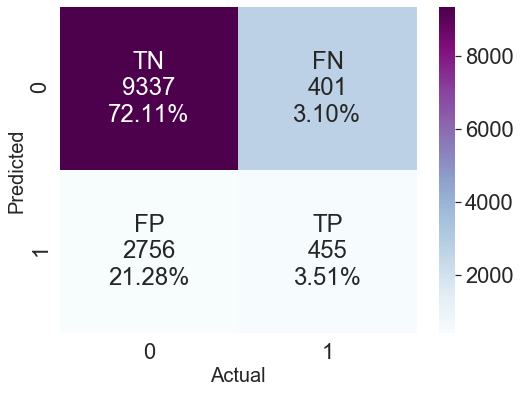

In [22]:
cf_matrix = metrics.confusion_matrix(test_labels,baseline3)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()

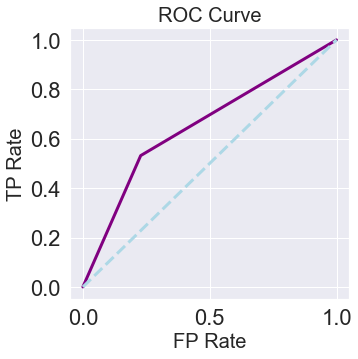

In [23]:
plt.rcParams['font.size'] = 16
plt.subplots(1, 1, figsize=(5,5))

rand_probs = [0 for _ in range(len(test_labels))]
rand_fpr, rand_tpr, thresholds = metrics.roc_curve(test_labels, rand_probs)

fpr, tpr, thresholds = metrics.roc_curve(test_labels, baseline3,
                                         pos_label=1)
plt.plot(fpr, tpr, linewidth=3, color='purple')
plt.plot(rand_fpr, rand_tpr, linestyle='--', linewidth=3, color='lightblue')
plt.title("ROC Curve", fontsize=20)
plt.xlabel("FP Rate", fontsize=20)
plt.ylabel("TP Rate", fontsize=20)
plt.show()

Semi-automated bias lexicon

In [24]:
baseline4 = test_features.bias_lexicon

In [25]:
print('Performance of b4, test:')
print('F1:', round(metrics.f1_score(test_labels,baseline4),2))
print('Precision:', round(metrics.precision_score(test_labels,baseline4),2))
print('Recall:', round(metrics.recall_score(test_labels,baseline4),2))
print('AUC:', round(metrics.roc_auc_score(test_labels,baseline4),2))
print('Accuracy:', round(metrics.accuracy_score(test_labels,baseline4),2))
print('Confusion matrix:\n', 
      metrics.confusion_matrix(test_labels,baseline4).transpose())

Performance of b4, test:
F1: 0.17
Precision: 0.35
Recall: 0.11
AUC: 0.55
Accuracy: 0.93
Confusion matrix:
 [[11919   761]
 [  174    95]]


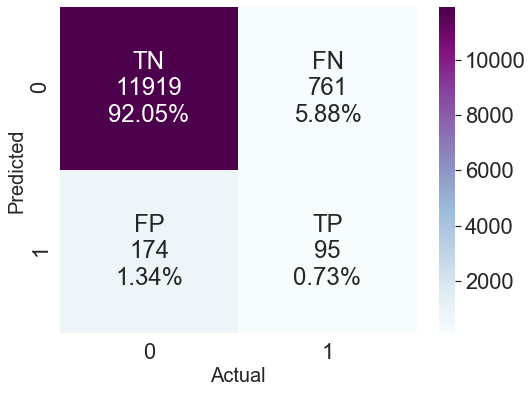

In [26]:
cf_matrix = metrics.confusion_matrix(test_labels,baseline4)
TN = cf_matrix[0][0]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
FP = cf_matrix[0][1]
fl = [TN, FN, FP, TP]
fig, ax = plt.subplots(figsize=(8,6))

sns.set(font_scale=2)
group_names = ['TN','FN','FP','TP']
group_counts = ["{0:0.0f}".format(value) for value in fl]
group_percentages = ["{0:.2%}".format(value) for value in
                     fl/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap="BuPu")
plt.ylabel('Predicted', fontsize=20)
plt.xlabel('Actual', fontsize=20)
ax.set_ylim([0,2])
ax.invert_yaxis()